In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader as data

In [4]:
!pip install yfinance
import yfinance as yf
import pandas as pd

start = '2010-01-01'
end = '2025-08-22'

df = yf.download('AAPL', start=start, end=end)

/tmp/ipython-input-4236861399.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424606,6.439316,6.375673,6.407194,493729600
2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2010-01-06,6.333345,6.461231,6.326740,6.435713,552160000
2010-01-07,6.321637,6.364266,6.275707,6.356761,477131200
2010-01-08,6.363663,6.364264,6.276005,6.313229,447610800


In [6]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600
2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900
2025-08-21,224.899994,226.520004,223.779999,226.270004,30621200


In [7]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.424606,6.439316,6.375673,6.407194,493729600
1,2010-01-05,6.435712,6.472037,6.401789,6.442317,601904800
2,2010-01-06,6.333345,6.461231,6.326740,6.435713,552160000
3,2010-01-07,6.321637,6.364266,6.275707,6.356761,477131200
4,2010-01-08,6.363663,6.364264,6.276005,6.313229,447610800


In [8]:
columns_to_drop = ['Date', 'Adj Close']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(existing_columns, axis=1)
df.head()

/tmp/ipython-input-882231944.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(existing_columns, axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424606,6.439316,6.375673,6.407194,493729600
1,6.435712,6.472037,6.401789,6.442317,601904800
2,6.333345,6.461231,6.326740,6.435713,552160000
3,6.321637,6.364266,6.275707,6.356761,477131200
4,6.363663,6.364264,6.276005,6.313229,447610800


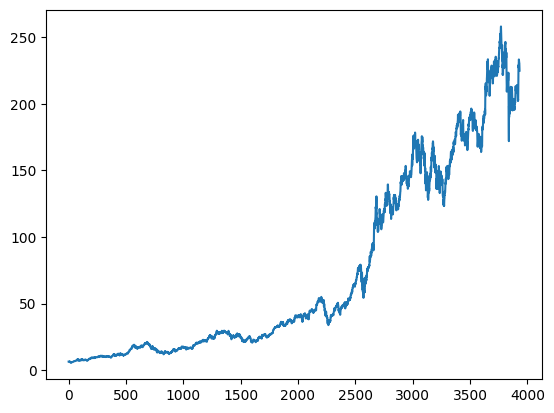

In [9]:
plt.plot(df.Close)

In [10]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.424606,6.439316,6.375673,6.407194,493729600
1,6.435712,6.472037,6.401789,6.442317,601904800
2,6.333345,6.461231,6.326740,6.435713,552160000
3,6.321637,6.364266,6.275707,6.356761,477131200
4,6.363663,6.364264,6.276005,6.313229,447610800
...,...,...,...,...,...
3928,231.589996,234.279999,229.339996,234.000000,56038700
3929,230.889999,233.119995,230.110001,231.699997,37476200
3930,230.559998,232.869995,229.350006,231.279999,39402600


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3928,206.730583
3929,206.807447
3930,206.903156
3931,206.930222


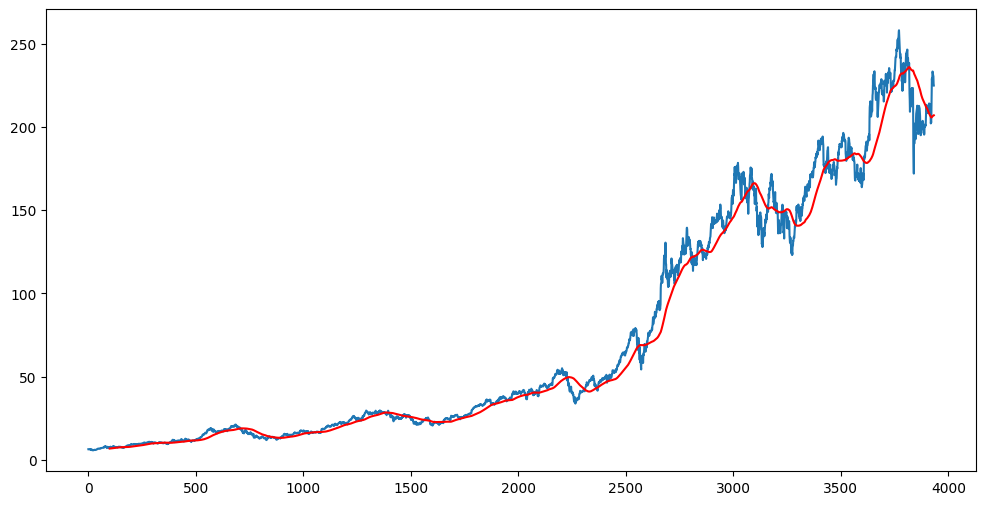

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3928,220.507259
3929,220.500116
3930,220.489978
3931,220.474857


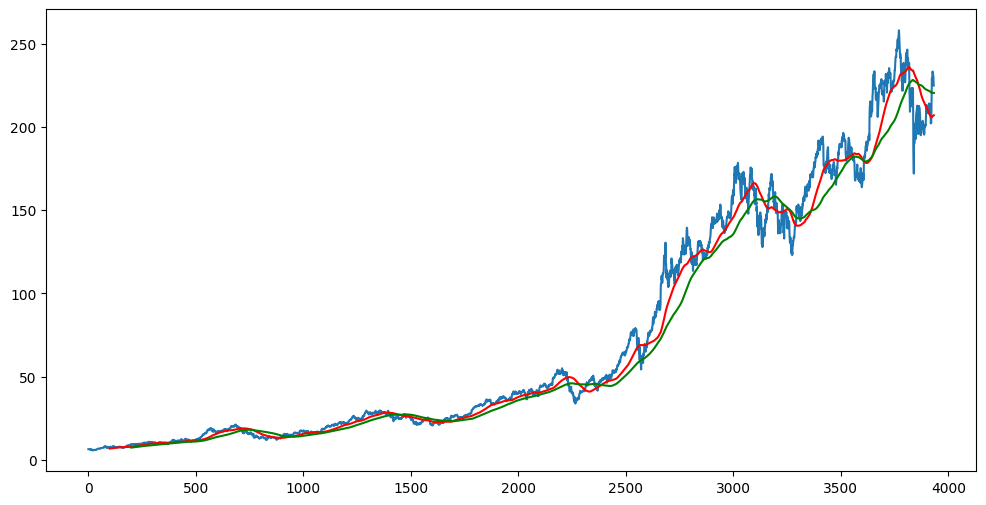

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(3933, 5)

In [16]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):])

print(data_training.shape)
print(data_testing.shape)

(2753, 1)
(1180, 1)


In [17]:
data_training.head()

Ticker,AAPL
0,6.424606
1,6.435712
2,6.333345
3,6.321637
4,6.363663


In [18]:
data_testing.head()

Ticker,AAPL
2753,118.661957
2754,120.084557
2755,119.275833
2756,118.661957
2757,124.605743


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00528436],
       [0.00537338],
       [0.00455283],
       ...,
       [0.90862511],
       [0.92034093],
       [0.92526156]])

In [21]:
data_training_array.shape

(2753, 1)

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(2653, 100, 1)

In [24]:
#ML model

In [25]:
!pip install tensorflow
!pip install keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0179
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 9.6117e-04
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 9.5514e-04
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0010
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 8.5598e-04


In [30]:
model.save('keras_model.h5')

In [31]:
data_testing.head()

Ticker,AAPL
2753,118.661957
2754,120.084557
2755,119.275833
2756,118.661957
2757,124.605743


In [32]:
data_training.tail(100)

Ticker,AAPL
2653,95.501915
2654,94.183815
2655,94.448395
2656,90.149452
2657,89.926117
...,...
2748,119.928642
2749,119.792259
2750,119.119911
2751,120.581505


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

Ticker,AAPL
0,95.501915
1,94.183815
2,94.448395
3,90.149452
4,89.926117


In [36]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.03315422],
       [0.02531668],
       [0.02688989],
       ...,
       [0.83622236],
       [0.80916762],
       [0.80256745]])

In [37]:
input_data.shape

(1280, 1)

In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
     x_test.append(input_data[i-100: i])
     y_test.append(input_data[i, 0])


In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1180, 100, 1)
(1180,)


In [41]:
y_predicted = model.predict(x_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [42]:
y_predicted.shape

(1180, 1)

In [43]:
y_test

array([0.17086602, 0.17932494, 0.17451619, ..., 0.83622236, 0.80916762,
       0.80256745])

In [44]:
y_predicted

array([[0.15496549],
       [0.15796809],
       [0.16076656],
       ...,
       [0.7715479 ],
       [0.7810809 ],
       [0.78810114]], dtype=float32)

In [45]:
scaler.scale_

array([0.00594609])

In [46]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

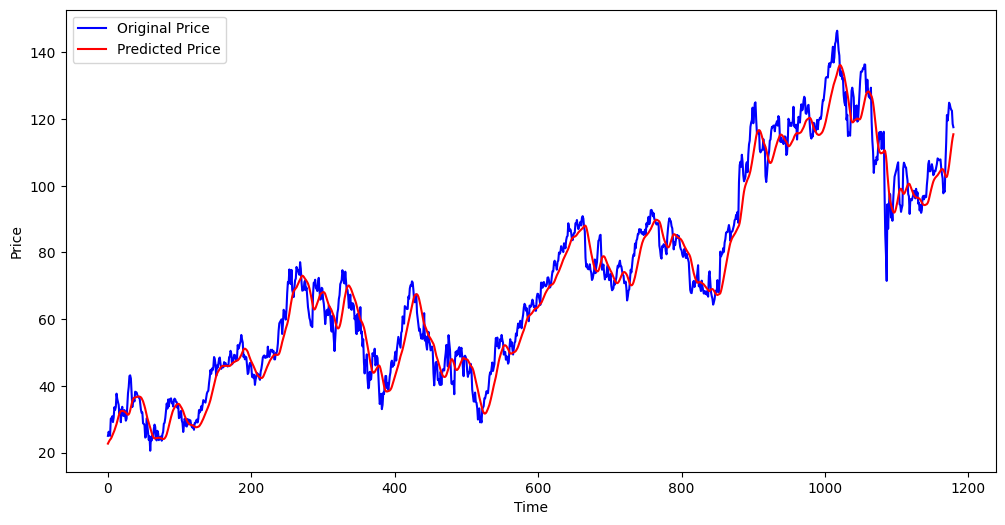

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()